# Overall medal tally section
* Dropdown table to see total medals by all countries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('athlete_events.csv')
region_df= pd.read_csv('noc_regions.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df=df.merge(region_df,on='NOC',how='left')

In [6]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
df.isnull().sum()

# It is not neccessary that NOC will always be linked to region, no NOC is null still 370 regions are null.

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [8]:
# number of duplicated rows
df.duplicated().sum()

1385

In [9]:
#removing duplicated rows  
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
#counting gold, silver and bronze medals indivisually and extreacting this information from medals column using get_dummies function

pd.get_dummies(df['Medal']).astype(int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
271111,0,0,0
271112,0,0,0
271113,0,0,0
271114,0,0,0


In [12]:
df_medals=pd.get_dummies(df['Medal']).astype(int)

In [13]:
df=pd.concat([df,df_medals],axis=1)

In [14]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0


In [15]:
df.shape

(269731, 20)

In [16]:
# Filtering and keeping only sukker based records
df= df[df['Season']=='Summer']

In [17]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [18]:
df.shape

(221167, 20)

In [19]:
# Since data given to us is athlete's data, So removing athletes who have won medals in team games
# Considering medal won in any sport as one, wheather indivisual or team sport
# hence athlete's in team game will have same-> team, NOC, sport, event

medal_tally= df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [20]:
medal_tally.shape

(105636, 20)

In [21]:
medal_tally= medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [22]:
medal_tally.head(25)

,NOC,Gold,Silver,Bronze
0,USA,1035,802,708
1,URS,394,317,294
2,GBR,278,317,300
3,GER,235,261,283
4,FRA,234,256,287
5,CHN,227,162,153
6,ITA,219,191,198
7,HUN,178,154,172
8,GDR,153,129,127
9,RUS,153,143,164


In [23]:
# How ever India's medal tally is comming out correct according to wikipedia, but some countries like USA data is little 
# incorrect due to certain certain resons.

medal_tally[medal_tally['NOC']=='IND']

,NOC,Gold,Silver,Bronze
53,IND,9,7,12


In [24]:
medal_tally['Total']= medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [25]:
medal_tally

,NOC,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,AHO,0,1,0,1
226,LBR,0,0,0,0
227,LCA,0,0,0,0
228,LES,0,0,0,0


In [26]:
import pickle as pkl

medal_tally = pd.DataFrame(medal_tally)

medal_tally.to_pickle('medal_tally.pkl')

# Overall analysis 
* total events, sports, editions, athletes and etc
* line plot 1. countries participating in every edition
            2. number of events in every edition
            3. number of atletes participating over time
* Frequecy of events using heatmap -> (y-plot-> sports and, x-plot-> years and value= events(count of values)
* Filtering top athletes based on sports filtering

In [27]:
# extreact all the years in which olympics was played to add to the drop down menu in the front end

df['Year'].unique().tolist()

[1992,
 2012,
 1920,
 1900,
 1932,
 1952,
 2000,
 1996,
 1912,
 1924,
 1948,
 2008,
 2016,
 2004,
 1984,
 1968,
 1972,
 1988,
 1936,
 1956,
 1960,
 1928,
 1976,
 1980,
 1964,
 1906,
 1904,
 1908,
 1896]

In [28]:
years=df['Year'].unique().tolist()

In [29]:
years.sort()

In [30]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [31]:
years.insert(0,'Overall')

In [32]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [33]:
# Extracting regions

df['region'].unique().tolist()


['China',
 'Denmark',
 'Netherlands',
 'Finland',
 'Norway',
 'Romania',
 'Estonia',
 'France',
 'Morocco',
 'Spain',
 'Egypt',
 'Iran',
 'Bulgaria',
 'Italy',
 'Chad',
 'Azerbaijan',
 'Sudan',
 'Russia',
 'Argentina',
 'Cuba',
 'Belarus',
 'Greece',
 'Cameroon',
 'Turkey',
 'Chile',
 'Mexico',
 'USA',
 'Nicaragua',
 'Hungary',
 'Nigeria',
 'Algeria',
 'Kuwait',
 'Bahrain',
 'Pakistan',
 'Iraq',
 'Syria',
 'Lebanon',
 'Qatar',
 'Malaysia',
 'Germany',
 'Canada',
 'Ireland',
 'Australia',
 'South Africa',
 'Eritrea',
 'Tanzania',
 'Jordan',
 'Tunisia',
 'Libya',
 'Belgium',
 'Djibouti',
 'Palestine',
 'Comoros',
 'Kazakhstan',
 'Brunei',
 'India',
 'Saudi Arabia',
 'Maldives',
 'Ethiopia',
 'United Arab Emirates',
 'Yemen',
 'Indonesia',
 'Philippines',
 nan,
 'Uzbekistan',
 'Kyrgyzstan',
 'Tajikistan',
 'Japan',
 'Republic of Congo',
 'Switzerland',
 'Brazil',
 'Monaco',
 'Israel',
 'Uruguay',
 'Sweden',
 'Sri Lanka',
 'Armenia',
 'Ivory Coast',
 'Kenya',
 'Benin',
 'UK',
 'Ghana',
 'S

In [34]:
country=df['region'].dropna().unique().tolist()


In [35]:
country.sort()

In [36]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [37]:
country.insert(0,'Overall')

In [38]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [39]:
df.shape

(221167, 20)

In [40]:
df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [41]:
fil_df=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [42]:
import matplotlib.pyplot as plt

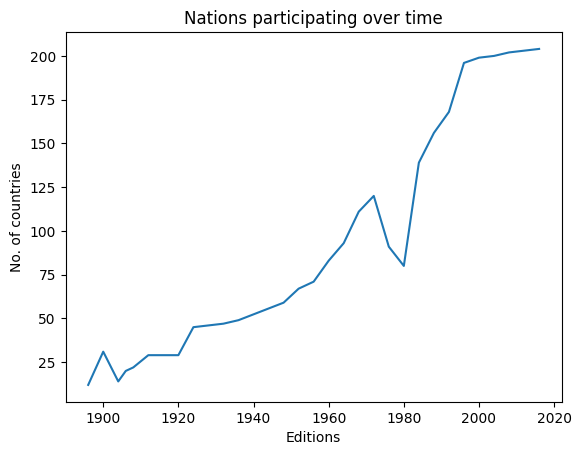

In [43]:
x=fil_df['Year']
y=fil_df['count']
plt.plot(x,y)
plt.xlabel('Editions')
plt.ylabel('No. of countries')
plt.title('Nations participating over time')
plt.show()

In [44]:
hm_df= df

In [45]:
hm_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [46]:
hm_df= hm_df.drop_duplicates(['Year', 'Sport', 'Event'])

In [47]:
hm_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194996,97860,Lonce Gaston Quentin,M,40.0,NaN,NaN,France,FRA,1920 Summer,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 28 metres, Indiv...",Silver,France,NaN,0,0,1
196039,98435,Ioannis Raisis,M,NaN,NaN,NaN,Greece,GRE,1906 Summer,1906,Summer,Athina,Fencing,"Fencing Men's Sabre, Masters, Individual",Silver,Greece,NaN,0,0,1
213142,107029,Franz Xaver Schmid,M,27.0,NaN,NaN,Germany,GER,1932 Summer,1932,Summer,Los Angeles,Alpinism,Alpinism Mixed Alpinism,Gold,Germany,NaN,0,1,0
214105,107506,Hermann Schreiber,M,26.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Aeronautics,Aeronautics Mixed Aeronautics,Gold,Switzerland,NaN,0,1,0


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
heatmap_data = hm_df.groupby(['Sport', 'Year'])['Event'].count().unstack()

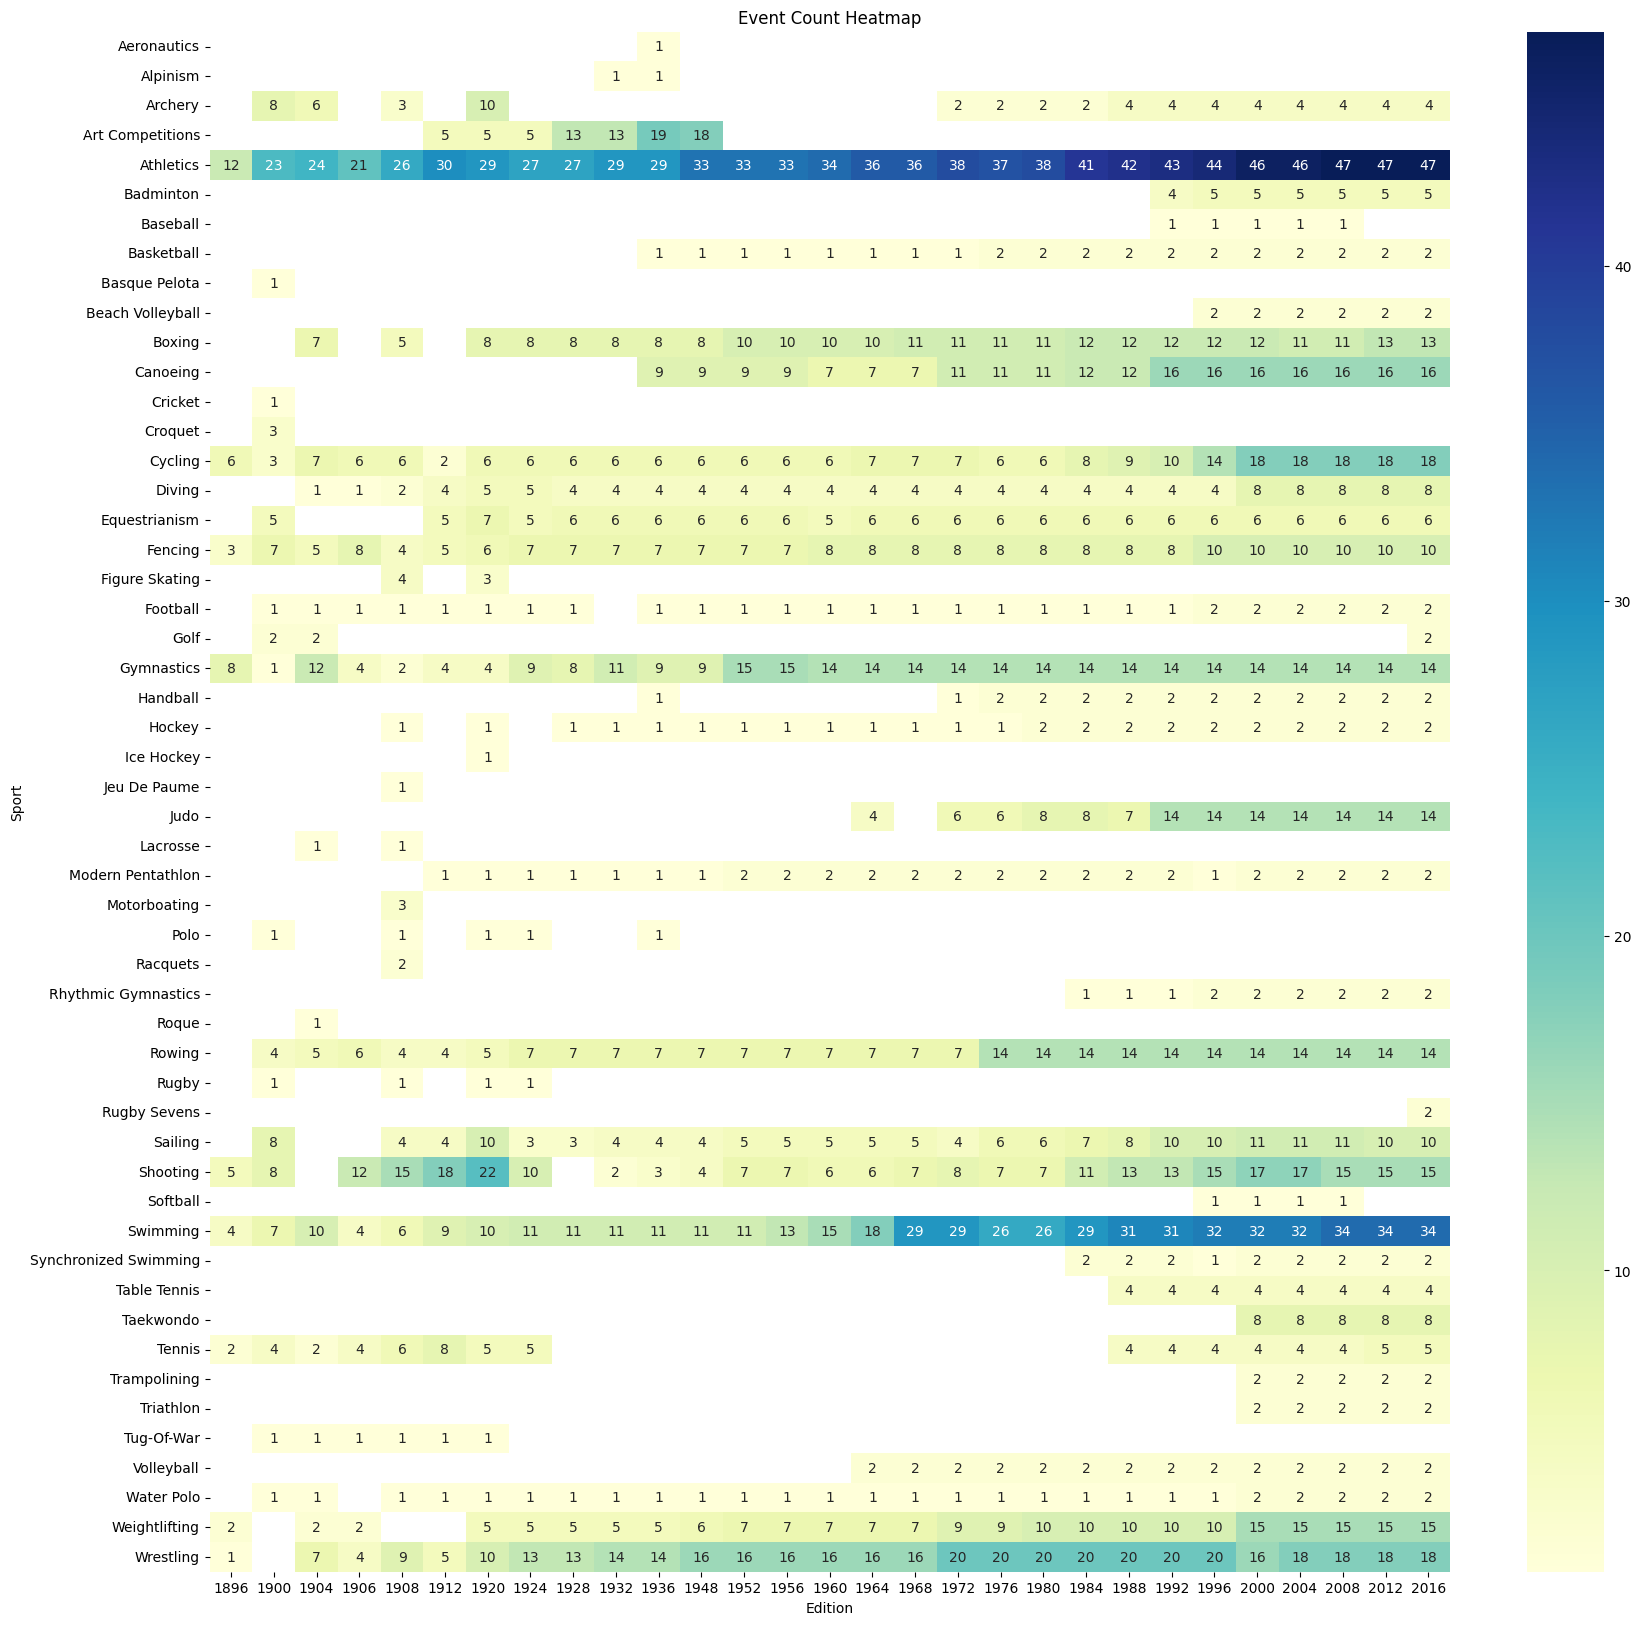

In [50]:
plt.figure(figsize=(20, 20))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Event Count Heatmap')
plt.xlabel('Edition')
plt.ylabel('Sport')
plt.show()

In [51]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [52]:
def most_successful(df, sport):
    temp_df= df.dropna(subset=['Medal'])
    if sport!='Overall':
        temp_df = temp_df[temp_df['Sport']==sport]
    x= temp_df['Name'].value_counts().reset_index().merge(df,on='Name', how='left')[['Name','count', 'Sport', 'region']]
    x=x.drop_duplicates(['Name'])
    x=x.rename(columns={'count':'Medals'})
    return x

In [53]:
most_successful(df,'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
...,...,...,...,...
63079,Joel Isasi Gonzlez,1,Athletics,Cuba
63081,Florena Andreea Isrescu,1,Gymnastics,Romania
63085,Ryoji Isaoka,1,Weightlifting,Japan
63088,Preben Isaksson,1,Cycling,Denmark


# Country wise analysis:
* country medal tally per year (line plot)
* what countries are good at(sports) using heatmap
* Most successful athletes (top 10)


In [54]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [55]:
df_new= df.dropna(subset=['Medal'])  

In [56]:
df_new

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1,0,0
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,Poland,NaN,1,0,0
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN,1,0,0


In [57]:
df_new= df_new.drop_duplicates(['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [58]:
df_new = df_new[df['region'] == 'India']

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24068\331605131.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new[df['region'] == 'India']


In [59]:
df_new

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4732,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4736,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
5033,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
5034,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
8192,4518,"Joseph Anthony ""Joe"" Antic",M,29.0,168.0,59.0,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India,NaN,0,0,1
21208,11197,Vasudevan Bhaskaran,M,29.0,174.0,68.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
21815,11520,Govinda Billimogaputtaswamy,M,20.0,171.0,60.0,India,IND,1972 Summer,1972,Summer,Munich,Hockey,Hockey Men's Hockey,Bronze,India,NaN,1,0,0
22004,11601,Abhinav Bindra,M,25.0,173.0,70.0,India,IND,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India,NaN,0,1,0
41379,21339,Rajendra Absolem Christy,M,30.0,165.0,58.0,India,IND,1968 Summer,1968,Summer,Mexico City,Hockey,Hockey Men's Hockey,Bronze,India,NaN,1,0,0
42473,21912,Leslie Walter Claudius,M,21.0,162.0,53.0,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [60]:
final_df=df_new.groupby(['Year']).count()['Medal']

In [61]:
final_df.reset_index()

,Year,Medal
0,1900,2
1,1928,1
2,1932,1
3,1936,1
4,1948,1
5,1952,2
6,1956,1
7,1960,1
8,1964,1
9,1968,1


In [62]:
final_df = final_df.to_frame()

In [63]:
print(final_df.columns)


Index(['Medal'], dtype='object')


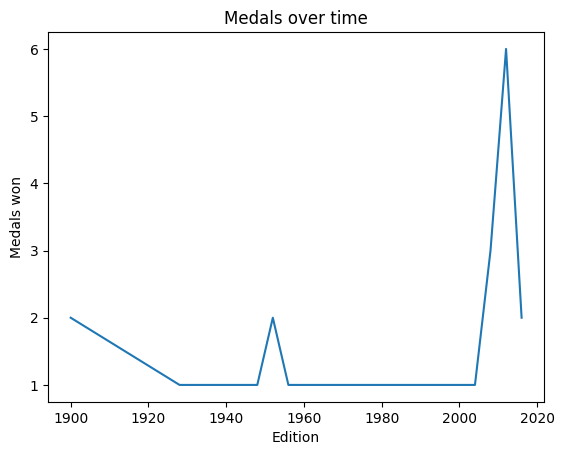

In [64]:
x = final_df.index 
y = final_df['Medal'] 
plt.plot(x, y)
plt.xlabel('Edition')
plt.ylabel('Medals won')
plt.title('Medals over time')
plt.show()

In [65]:
dff = df_new[df['region'] == 'India']

C:\Users\KIIT\AppData\Local\Temp\ipykernel_24068\660622752.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dff = df_new[df['region'] == 'India']


In [66]:
dff

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4732,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4736,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
5033,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
5034,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
8192,4518,"Joseph Anthony ""Joe"" Antic",M,29.0,168.0,59.0,India,IND,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Silver,India,NaN,0,0,1
21208,11197,Vasudevan Bhaskaran,M,29.0,174.0,68.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
21815,11520,Govinda Billimogaputtaswamy,M,20.0,171.0,60.0,India,IND,1972 Summer,1972,Summer,Munich,Hockey,Hockey Men's Hockey,Bronze,India,NaN,1,0,0
22004,11601,Abhinav Bindra,M,25.0,173.0,70.0,India,IND,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India,NaN,0,1,0
41379,21339,Rajendra Absolem Christy,M,30.0,165.0,58.0,India,IND,1968 Summer,1968,Summer,Mexico City,Hockey,Hockey Men's Hockey,Bronze,India,NaN,1,0,0
42473,21912,Leslie Walter Claudius,M,21.0,162.0,53.0,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


<Axes: xlabel='Year', ylabel='Sport'>

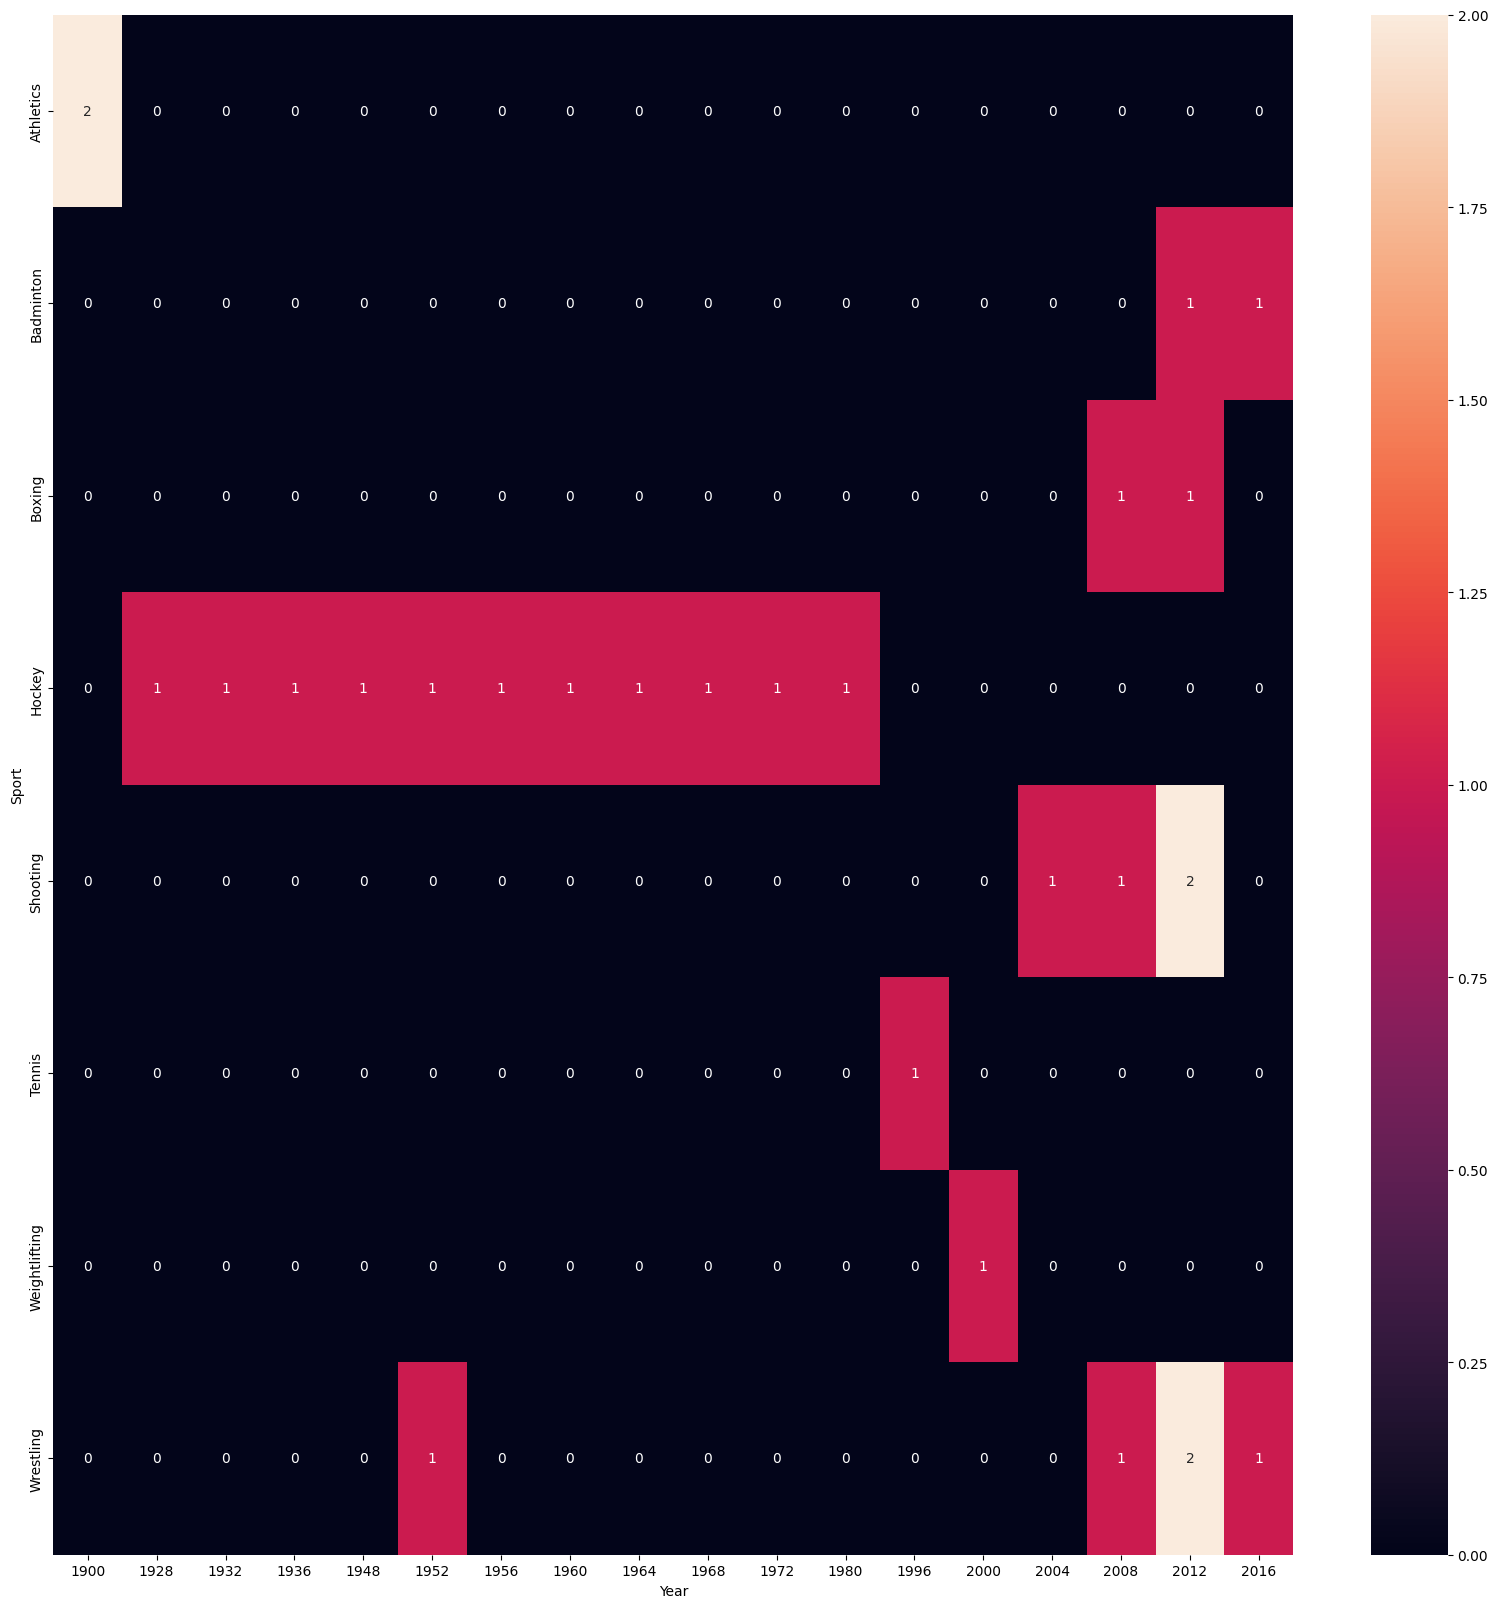

In [67]:
plt.figure(figsize=(20,20))
sns.heatmap(dff.pivot_table(index='Sport', columns='Year', values='Medal',aggfunc='count').fillna(0),annot=True)

In [68]:
 def most_successful_athletes_countrywise(df, country):
    temp_df= df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region']==country]
    x= temp_df['Name'].value_counts().reset_index().merge(df,on='Name', how='left')[['Name','count', 'Sport', 'region']]
    x=x.drop_duplicates(['Name'])
    x=x.rename(columns={'count':'Medals'})
    return x

In [69]:
most_successful_athletes_countrywise(df, 'India')

,Name,Medals,Sport,region
0,Udham Singh Kular,4,Hockey,India
4,Leslie Walter Claudius,4,Hockey,India
8,Shankar Pillay Laxman,3,Hockey,India
11,Ranganathan Francis,3,Hockey,India
14,Richard James Allen,3,Hockey,India
...,...,...,...,...
252,Ahsan Muhammad Khan,1,Hockey,India
253,Ahmed Sher Khan,1,Hockey,India
254,Maharaj Krishon Kaushik,1,Hockey,India
255,"Patrick Anthony ""Pat"" Jansen",1,Hockey,India


# Athlete wise analysis
* Analysis base on, age, sex, height, weight and medals

In [76]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [71]:
import plotly.figure_factory as ff

In [72]:
athlete_df=df.drop_duplicates(['Name','region'])

In [77]:
athlete_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN,1,0,0
271105,135565,Fernando scar Zylberberg,M,23.0,168.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [82]:
fig= ff.create_distplot([athlete_df['Age'].dropna()],['Age Distribution'],show_hist=False, show_rug=False)
fig.show()

In [83]:
x1=athlete_df['Age'].dropna()
x2=athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3=athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4=athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [85]:
fig1= ff.create_distplot([x1,x2,x3,x4],['Age Distribution','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False, show_rug=False)
fig1.show()

In [89]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']
for sport in famous_sports:
    temp_df=athlete_df[athlete_df['Sport']==sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

In [90]:
fign=ff.create_distplot(x, name, show_hist=False, show_rug=False)
fign.show()